#### Initializing | Importing | Reading data | Extracting data

In [393]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans                      # For KMeans Clustering
from sklearn.metrics import silhouette_samples          # For silhouette score (Number of clusters)
from sklearn.linear_model import LogisticRegression     # For Logistic Regression
from sklearn.ensemble import RandomForestClassifier     # For Random Forrest Classification
from sklearn import metrics                             # For evaluation metrics
from sklearn.metrics import accuracy_score              # For assessing accuracy score
from sklearn.model_selection import train_test_split    # For splitting data
from sklearn.linear_model import LinearRegression       # For linear regression
from scipy.special import expit                         # For logistic sigmoid function
from sklearn.decomposition import PCA                   # For PCA (Principal Component Analysis)
from scipy import stats                                 # For the conducting statistics and standerdizing
from scipy.stats import mannwhitneyu                    # For Mann-Whitney U test
from scipy.stats import ttest_ind                       # For independent t-tests
from scipy.special import expit                         # For the logistic sigmoid function
from sklearn.ensemble import RandomForestClassifier     # For random forrest


# Initializing seed
random.seed(13604503)

# Importing data
art = pd.read_csv("theArt.csv")
the_data = pd.read_csv("theData.csv", header = None)

# only the art pieces | drop NaN values (there are none in this subset)
art_pieces = the_data[the_data.columns[:91]].dropna()

# ratings of all classical art
classical_art = art_pieces[art_pieces.columns[:35]]

# ratings of all modern art
modern_art = art_pieces[art_pieces.columns[35:70]]

# ratings of all non-human art
non_human = art_pieces[art_pieces.columns[70:91]]

# Looking at shape of each dataset to see if it make sense. It makes sense so far.
print(f"art dataset is {art.shape}")
print(f"data dataset is {the_data.shape}")
# The number of of columns in the "art_pieces" should be identical to the number of rows in "art"
print(f"the subset of the dataset 'data' that only conatians the art pieces is {art_pieces.shape}")
print(f"Classical art is {classical_art.shape}")
print(f"Modern art is {modern_art.shape}")
print(f"Non-human art is {non_human.shape}")    

# Creating a function for descriptive statistics
list1 = []
list2 = []

def descriptive_statistics(array1, array2):
    """
    This function computes the median the std of two arrays \n
    Parameters: \n
    array1, array2: Two arrays \n
    Returns: \n
    Two lists containing the median and std of both arrays
    """
    global list1, list2
    list1.clear()
    list2.clear()
    list1.append(round(np.median(array1), 2))       # Find median of array 1
    list1.append(round(array1.std(), 2))            # Find std of array 1
    list2.append(round(np.median(array2), 2))       # Find median of array 2
    list2.append(round(array2.std(), 2))            # Find std of array 2
    return(list1, list2)

art dataset is (91, 8)
data dataset is (300, 221)
the subset of the dataset 'data' that only conatians the art pieces is (300, 91)
Classical art is (300, 35)
Modern art is (300, 35)
Non-human art is (300, 21)


#### Question 1: Is classical art more well-liked than modern art?

Median art ratings for classical art is 5.0
Median art ratings for modern art is 4.0
Standered deviation of classical art ratings is 1.46
Standered deviation of modern art ratings is 1.64
The median rating for classical art is 1 point higher than that of modern art.


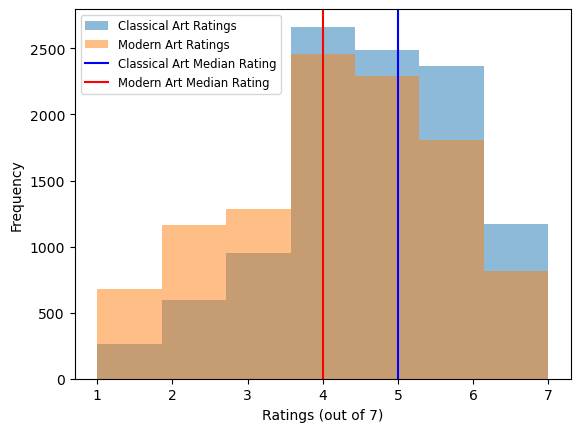

The U statistic is 64145482 and the P-value is 3.1763266572309033e-97
The P-value (rounded to 3 decimals) is 0.0 which is smaller than the significance level α = 0.05. Therefore, we reject the Null hypothesis.


In [394]:
# create array flattened array of classical art ratings
classical_art_array = classical_art.to_numpy()
classical_art_flatten = classical_art_array.flatten()

    
# create flattened array of modern art ratings
modern_art_array = modern_art.to_numpy()
modern_art_flatten = modern_art_array.flatten()

# Descriptive statistics using user-defined function
descriptive_statistics(classical_art_flatten, modern_art_flatten)

print(f"Median art ratings for classical art is {list1[0]}")
print(f"Median art ratings for modern art is {list2[0]}")
print(f"Standered deviation of classical art ratings is {list1[1]}")
print(f"Standered deviation of modern art ratings is {list2[1]}")
print(f"The median rating for classical art is 1 point higher than that of modern art.")

# Plotting
plt.hist(classical_art_flatten, bins= 7, alpha=0.5, label="Classical Art Ratings")
plt.hist(modern_art_flatten, bins = 7, alpha=0.5, label="Modern Art Ratings")
plt.axvline(list1[0], color='blue', label='Classical Art Median Rating')
plt.axvline(list2[0], color='red', label = "Modern Art Median Rating")
plt.legend(loc='upper left', fontsize = "small")
plt.xlabel('Ratings (out of 7)')
plt.ylabel('Frequency')
plt.show()

# Mann-Whitney U test
u1, p1 = mannwhitneyu(classical_art_flatten, modern_art_flatten)

# Conclusion
print(f"The U statistic is {round(u1)} and the P-value is {p1}")
print(f"The P-value (rounded to 3 decimals) is {round(p1, 3)} which is smaller than the significance level α = 0.05. Therefore, we reject the Null hypothesis.")

#### Question 2: Is there a difference in the preference ratings for modern art vs. non-human (animals andcomputers) generated art?

Median rating of non-human art (AI generated) is 3.0
Median rating of modern art median rating 4.0
Standered deviation of non-human art (AI generated) ratings is 1.66
Standered deviation of modern art ratings is 1.64
The median rating for modern art is 1 point higher than that of non-human (AI generated) art.


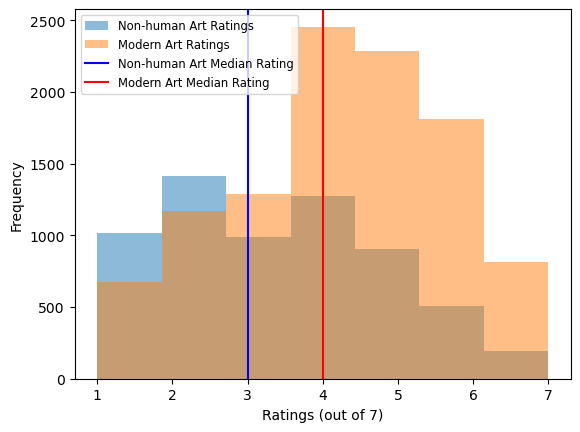

The U statistic is 22663464 and the P-value is 8.742809791074804e-264
The P-value (rounded to 3 decimals) is 0.0 which is smaller than the significance level α = 0.05. Therefore, we reject the Null hypothesis.


In [395]:
# create flattened array of non-human art ratings
non_human_array = non_human.to_numpy()
non_human_flatten = non_human_array.flatten()

# Descriptive statistics using user-defined function
descriptive_statistics(non_human_flatten, modern_art_flatten)

print(f"Median rating of non-human art (AI generated) is {list1[0]}")
print(f"Median rating of modern art median rating {list2[0]}")
print(f"Standered deviation of non-human art (AI generated) ratings is {list1[1]}")
print(f"Standered deviation of modern art ratings is {list2[1]}")
print(f"The median rating for modern art is 1 point higher than that of non-human (AI generated) art.")

# Plotting
plt.hist(non_human_flatten, bins= 7, alpha=0.5, label="Non-human Art Ratings")
plt.hist(modern_art_flatten, bins = 7, alpha=0.5, label="Modern Art Ratings")
plt.axvline(list1[0], color='blue', label='Non-human Art Median Rating')
plt.axvline(list2[0], color='red', label = "Modern Art Median Rating")
plt.legend(loc='upper left', fontsize = "small")
plt.xlabel('Ratings (out of 7)')
plt.ylabel('Frequency')
plt.show()

# Mann-Whitney U test
u2, p2 = mannwhitneyu(non_human_flatten, modern_art_flatten)

# Conclusion
print(f"The U statistic is {round(u2)} and the P-value is {p2}")
print(f"The P-value (rounded to 3 decimals) is {round(p2, 3)} which is smaller than the significance level α = 0.05. Therefore, we reject the Null hypothesis.")

#### Question 3: Do women give higher art preference ratings than men?

Median art ratings for women is 4.0
Standered deviation of art ratings for women is 4.0
Median art ratings for men is 1.62
Standered deviation of art ratings for men is 1.71
Both the median and standered deviation for men and women for art ratings are the same.


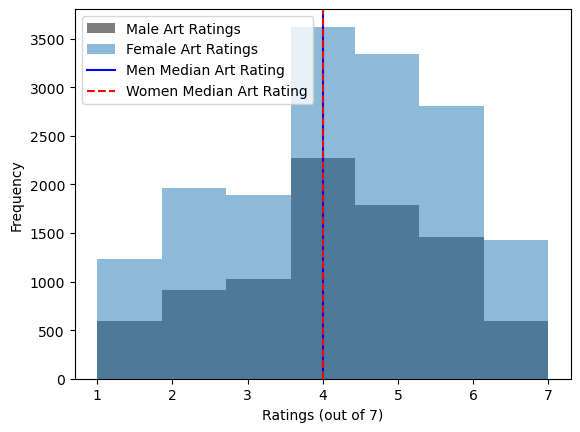

Welch T-test
-0.5139975116115761 0.6072598833057807 

The U statistic is 69823415.5 and the P-value is 0.2712910876266065
The P-value (rounded to 3 decimals) is 0.271 which is greater than the significance level α = 0.05. Therefore, we fail to reject the Null hypothesis.


In [396]:
# create gender column | from instructions, gender column is 216 (217 less 1)
gender = the_data[the_data.columns[216]].to_frame()

# join art ratings with gender and drop NaN
art_gender = pd.concat([art_pieces, gender], axis=1).replace([np.inf, -np.inf], np.nan).dropna()

# create ratings of only male | then drop last column (gender column) | then flatten
male = art_gender[art_gender[216] == 1.0]
male = male[male.columns[:91]]
male_flatten = male.to_numpy().flatten()

# create ratings of only female | then drop last column (gender column) | then flatten
female = art_gender[art_gender[216] == 2.0]
female = female[female.columns[:91]]
female_flatten = female.to_numpy().flatten()

# create ratings of only binary | then drop last column (gender column) | then flatten
binary = art_gender[art_gender[216] == 3.0]
binary = binary[binary.columns[:91]]
binary_flatten = binary.to_numpy().flatten()

# Descriptive statistics using user-defined function
descriptive_statistics(male_flatten, female_flatten)

print(f"Median art ratings for women is {list1[0]}")
print(f"Standered deviation of art ratings for women is {list2[0]}")
print(f"Median art ratings for men is {list1[1]}")
print(f"Standered deviation of art ratings for men is {list2[1]}")
print(f"Both the median and standered deviation for men and women for art ratings are the same.")

# Plotting
plt.hist(male_flatten, bins= 7, alpha=0.5, label="Male Art Ratings", color = "black")
plt.hist(female_flatten, bins = 7, alpha=0.5, label="Female Art Ratings")
plt.axvline(np.median(male_flatten), color='blue', label='Men Median Art Rating')
plt.axvline(np.median(female_flatten), color='red', linestyle='--', label = "Women Median Art Rating")
plt.legend(loc='upper left')
plt.xlabel('Ratings (out of 7)')
plt.ylabel('Frequency')
plt.show()

# Mann-Whitney U test
u3, p3 = mannwhitneyu(male_flatten, female_flatten)

# Welch t-test
print("Welch T-test")
result = ttest_ind(male_flatten, female_flatten, equal_var= False)
print(result[0], result[1], "\n")

# Conclusion
print(f"The U statistic is {round(u3,3)} and the P-value is {p3}")
print(f"The P-value (rounded to 3 decimals) is {round(p3, 3)} which is greater than the significance level α = 0.05. Therefore, we fail to reject the Null hypothesis.")

#### Question 4: Is there a difference in the preference ratings of users with some art background (some art education) vs. none?

Median art ratings for those with some background in art ed is 4.0
Standered deviation of art ratings for those with some background in art ed is 4.0
Median art ratings for those with no background in art ed is 4.0
Standered deviation of art ratings for those with no background in art ed is 1.68
Both the median and standered deviation for those with some some background in art education and those with non are the same.


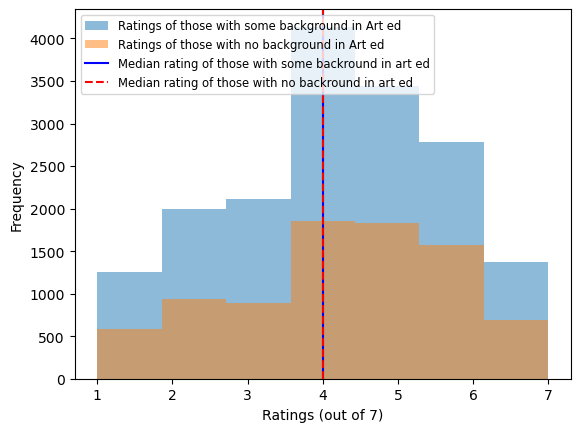

The U statistic is 68504156.0 and the P-value is 1.0118570941459344e-08
The P-value (rounded to 3 decimals) is 0.0 which is smaller than the significance level α = 0.05. Therefore, we reject the Null hypothesis.


In [397]:
art_ed = the_data[the_data.columns[218]].to_frame()
# art_ed.replace([np.inf, -np.inf], np.nan, inplace=True)
# art_ed = art_ed.astype(int)

# join art ratings with art education | reaplce inf and -inf with Nan | drop NaN
art_ed_ratings = pd.concat([art_pieces, art_ed], axis=1).replace([np.inf, -np.inf], np.nan).dropna()

# create ratings of those with only some background (art_ed = 2.0) | drop last column (art_ed column) | convert to numpy array | flatten to 1-D array
some_background = art_ed_ratings[art_ed_ratings[218] != 0.0]
some_background = some_background[some_background.columns[:91]]
some_background_flatten = some_background.to_numpy().flatten()

# create ratings of those with only no art education (art_ed = 1.0) | drop last column (art_ed column) | convert to numpy array | flatten to 1-D array
no_background = art_ed_ratings[art_ed_ratings[218] == 0.0]
no_background = no_background[no_background.columns[:91]]
no_background_flatten = no_background.to_numpy().flatten()

# Descriptive statistics using user-defined function
descriptive_statistics(some_background_flatten, no_background_flatten)

print(f"Median art ratings for those with some background in art ed is {list1[0]}")
print(f"Standered deviation of art ratings for those with some background in art ed is {list2[0]}")
print(f"Median art ratings for those with no background in art ed is {list2[0]}")
print(f"Standered deviation of art ratings for those with no background in art ed is {list2[1]}")
print(f"Both the median and standered deviation for those with some some background in art education and those with non are the same.")

# Plotting
plt.hist(some_background_flatten, bins= 7, alpha=0.5, label="Ratings of those with some background in Art ed")
plt.hist(no_background_flatten, bins = 7, alpha=0.5, label="Ratings of those with no background in Art ed")
plt.axvline(list1[0], color='blue', label='Median rating of those with some backround in art ed')
plt.axvline(list2[0], color='red', linestyle='--', label = "Median rating of those with no backround in art ed")
plt.legend(loc='upper left', fontsize = "small")
plt.xlabel('Ratings (out of 7)')
plt.ylabel('Frequency')
plt.show()

# Mann-Whitney U test
u4, p4 = mannwhitneyu(some_background_flatten, no_background_flatten)

# Conclusion
print(f"The U statistic is {round(u4,3)} and the P-value is {p4}")
print(f"The P-value (rounded to 3 decimals) is {round(p4, 3)} which is smaller than the significance level α = 0.05. Therefore, we reject the Null hypothesis.")

#### Question 5: Build a regression model to predict art preference ratings from energy ratings only. Make sure to use cross-validation methods to avoid overfitting and characterize how well your model predicts art preference ratings.

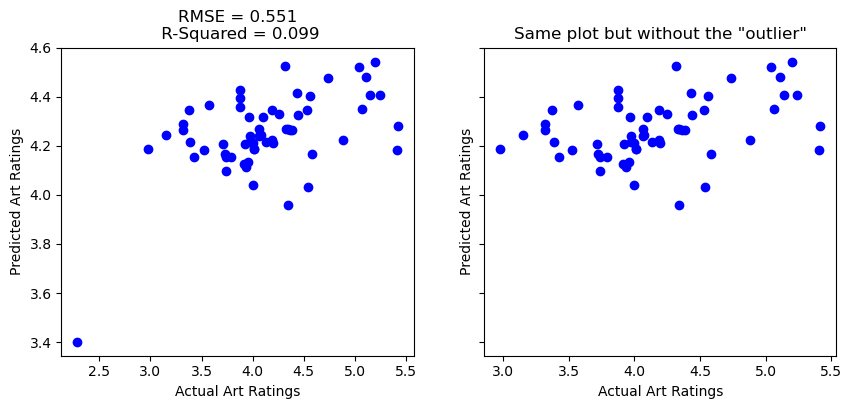

The Root Mean Square Error is 0.55 which means that on average, the predicted values are off by 0.55 units from the actual values.
An R-sqaured value of 0.1 indicates that only 10.0% in average art ratings (Y) is explained by average energy ratings (X) in the model.
We should not be surprised that average energy ratings account for only small variability since there are many other features that should be accounted for.


In [398]:
# Goal: Predict art preference ratings from energy

# Join art ratings | drop NaN
art_energy = art_pieces.join(the_data.iloc[:, 91:182]).dropna()

# Extract energy columns | reduce predictor (energy) to median and reshape
x1 = art_energy.iloc[:,91:].mean(axis = 1).to_numpy()
x1 = x1.reshape(len(x1), 1)

# Extract art ratings columns | Reduce dependent variable (ratings) to median and reshape
y1 = art_energy.iloc[:, :91].mean(axis = 1).to_numpy()
y1 = y1.reshape(len(y1), 1)

# Splitting the data set for cross-validation
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size= 0.2, random_state = 13604503)

# Training/building the model
regr1 = LinearRegression().fit(x_train,y_train) 
slope1 = regr1.coef_ 
yInt1 = regr1.intercept_

# Cross-validation
yHat1 = slope1[0]*x_train[:,0] + yInt1
y_pred1 = regr1.predict(x_test)                     # Finding predicted values
yHat11 = slope1[0]*x_test[:,0]  + yInt1             # ==> How to find predicted values manually
rmse = np.sqrt(np.mean((y_pred1 - y_test)**2))      # Finding Root Mean Squared Error (RMSE) 
rSqr = regr1.score(x1,y1)                             # Finding R-squared

# Dropping one of the outliers just to see how things differ
outlier = pd.DataFrame(y_test).join(pd.DataFrame(y_pred1), lsuffix='1', rsuffix='2')
outlier = outlier.drop(34) 

# Plotting with and without outliers side by side
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10,4))

# Plot 1: With the "outlier"
ax1.scatter(y_test, y_pred1, color='blue')
ax1.set_title(f"RMSE = {round(rmse,3)}\n R-Squared = {round(rSqr,3)}")
ax1.set_xlabel('Actual Art Ratings')
ax1.set_ylabel('Predicted Art Ratings')

# Without the "Outlier"
ax2.scatter(outlier.iloc[:,0], outlier.iloc[:,1], color='blue')
ax2.set_title(f'Same plot but without the "outlier"')
ax2.set_xlabel('Actual Art Ratings')
ax2.set_ylabel('Predicted Art Ratings')

plt.show()

print(f"The Root Mean Square Error is {round(rmse,2)} which means that on average, the predicted values are off by {round(rmse,2)} units from the actual values.")
print(f"An R-sqaured value of {round(rSqr, 2)} indicates that only {round(rSqr,2)*100}% in average art ratings (Y) is explained by average energy ratings (X) in the model.")
print(f"We should not be surprised that average energy ratings account for only small variability since there are many other features that should be accounted for.")


#### Question 6: Build a regression model to predict art preference ratings from energy ratings and demographic information. Make sure to use cross-validation methods to avoid overfitting and comment on how well your model predicts relative to the “energy ratings only” model.  

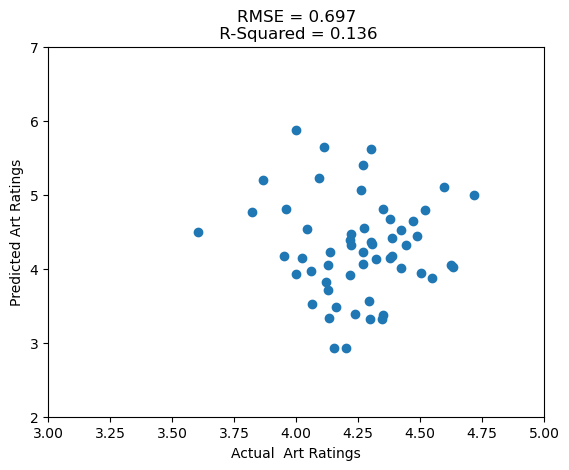

The Root Mean Square Error is 0.7 which means that on average, the predicted values are off by 0.7 units from the actual values.
An R-sqaured value of 0.14 indicates that only 14.000000000000002% in average art ratings (Y) is explained by average energy ratings and demographic informaiton (X) in the model.
After adding two additional explanotary (age and gender) variables upon average energy ratings, we got a smaller RMSE and a larger R-squared.


In [399]:
# Goal: Predict "art preference ratings" from "energy ratings" AND "demographic information" (age, gender)
# X (IV): Energy ratings [91-181], demographic information ==> age [215] and gender [216]
# Y (DV): Art preference [art_pieces]

# # Joing art (art ratings), (energy), (age), (gender) | use index location (iloc) to find age and gender | drop NaN
ratings_energy_age_gender = art_pieces.join(the_data.iloc[:, 91:182]).join(the_data.iloc[:, [215, 216]]).dropna()

# Create the predictor | extract only (energy) using label (.loc) and turn to medians | joing with age and gender 

x2 = ratings_energy_age_gender.loc[:,91:182].mean(axis = 1).to_frame().join(ratings_energy_age_gender.loc[:, [215, 216]]).to_numpy()


# Create the dependent variable (art ratings) | turn to medians
y2 = ratings_energy_age_gender.iloc[:,:91].mean(axis = 1).to_numpy()

# Splitting the data set for cross-validation
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size= 0.2, random_state = 13604503)

# Training/building the model
regr2 = LinearRegression().fit(x_train2,y_train2) 
slope2 = regr2.coef_ 
yInt2 = regr2.intercept_

# Cross-validation 
# b[0]* energy + b[1]*age + b[2]*gender + intercept
yHat2 = slope2[0]*x_train2[:,0] + slope2[1]*x_train2[:,1] + slope2[2]*x_train2[:,2] + yInt2
y_pred2 = regr2.predict(x_test2)                        # Finding predicted values
# yHat22 = slope2[0]*x_test2[:,0] + slope2[1]*x_test2[:,1] + slope2[2]*x_test2[:,2] + yInt2               #  ==> How to find predicted values manually
rmse2 = np.sqrt(np.mean((y_pred2 - y_test2)**2))        # Finding Root Mean Squared Error (RMSE) 
rSqr2 = regr2.score(x2,y2) 

# Plotting | actual values on the x axis and predicted values on the y-axis
plt.scatter(y_pred2, y_test2)
plt.title(f"RMSE = {round(rmse2,3)}\n R-Squared = {round(rSqr2,3)}")
plt.xlabel('Actual  Art Ratings')
plt.ylabel('Predicted Art Ratings')
plt.xlim(3, 5)
plt.ylim(2, 7)
plt.show()


print(f"The Root Mean Square Error is {round(rmse2,2)} which means that on average, the predicted values are off by {round(rmse2,2)} units from the actual values.")
print(f"An R-sqaured value of {round(rSqr2, 2)} indicates that only {round(rSqr2,2)*100}% in average art ratings (Y) is explained by average energy ratings\
 and demographic informaiton (X) in the model.")
print(f"After adding two additional explanotary (age and gender) variables upon average energy ratings, we got a smaller RMSE and a larger R-squared.")

#### Question 7: Considering the 2D space of average preference ratings vs. average energy rating (that contains the 91 art pieces as elements), how many clusters can you – algorithmically - identify in this space? Make sure to comment on the identity of the clusters – do they correspond to particular types of art? (*Note: Split to many cells)

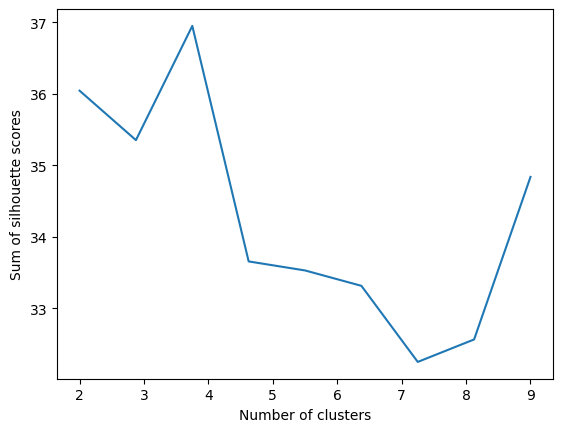

From the graph of number of clusters and sum of silhouette scores we can observe that the highest sum of silhouette score corresponds to 4 clusters.
Therefore, we choose 4 as the number of clusters (K = 4).


In [400]:
# Clustering using average preferecne rating and average energy ratings

# Extraxting art ratings | reducing to mean column wise | turn to array

x3 = art_energy.iloc[:, :91].mean(axis = 0).to_numpy()
x3 = x3.reshape(len(x3), 1)

# Extraxting energy ratings | reducing to mean column wise | turn to array
y3 = art_energy.iloc[:,91:].mean(axis = 0).to_numpy()
y3 = y3.reshape(len(y3), 1)

predictors = np.concatenate((x3, y3), axis = 1)

numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
sSum = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans for each k:
for ii in range(2, numClusters+2):                          # Loop through each cluster (from 2 to 10)
    kMeans = KMeans(n_clusters = int(ii)).fit(predictors)   # Compute kmeans using scikit
    cId = kMeans.labels_                                    # Vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_                       # Coordinate location for center of each cluster
    s = silhouette_samples(predictors,cId)                  # Compute the mean silhouette coefficient of all samples
    sSum[ii-2] = sum(s)                                     # Take the sum ==> Highest sum = best clustering

# Plot the sum of the silhouette scores as a function of the number of clusters, to make it clearer what is going on
plt.plot(np.linspace(2,numClusters,9),sSum)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

print(f"From the graph of number of clusters and sum of silhouette scores we can observe that the highest sum of silhouette score corresponds to 4 clusters.\n\
Therefore, we choose 4 as the number of clusters (K = 4).")

##### k-Means Clustering

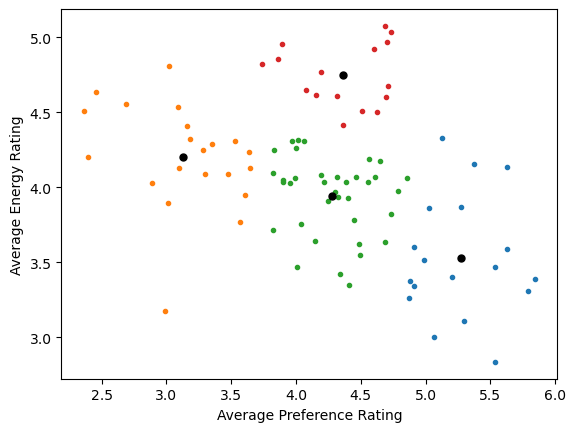

After clustering the data to 4 clusters, we conclude the following:
Cluster one: Low average preference rating and medium average energy rating
Cluster two: Medium average preference rating and medium average energy rating
Cluster three: Medium average preference rating and high average energy rating
Cluster four: High average preference rating and low average energy rating


In [401]:
# kMeans to cluster the data
# Algorithm: Minimize the summed distances between a cluster center and its members. Once the minimum has been found (regardless of starting
#position), it stops.

# kMeans:
numClusters = 4                                                 # Number of clusters
kMeans = KMeans(n_clusters = numClusters).fit(predictors)       # KMeans algorithm
cId = kMeans.labels_                                            # returns cluster labels
cCoords = kMeans.cluster_centers_ 

# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(predictors[plotIndex,0],predictors[plotIndex,1],'o',markersize=3)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Average Preference Rating')
    plt.ylabel('Average Energy Rating')
plt.show()

print(f"After clustering the data to 4 clusters, we conclude the following:")
print(f"Cluster one: Low average preference rating and medium average energy rating")
print(f"Cluster two: Medium average preference rating and medium average energy rating")
print(f"Cluster three: Medium average preference rating and high average energy rating")
print(f"Cluster four: High average preference rating and low average energy rating")

#### Question 8: Considering only the first principal component of the self-image ratings as inputs to a regression model – how well can you predict art preference ratings from that factor alone? (*Note: Split to many cells)

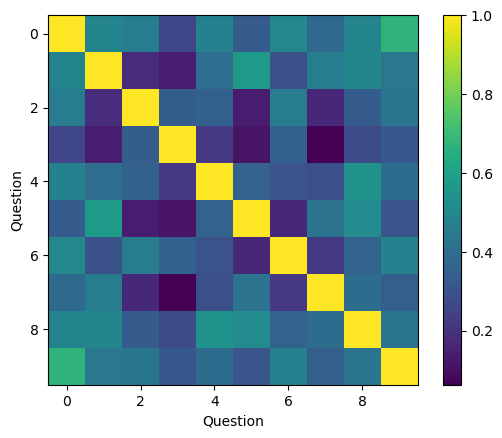

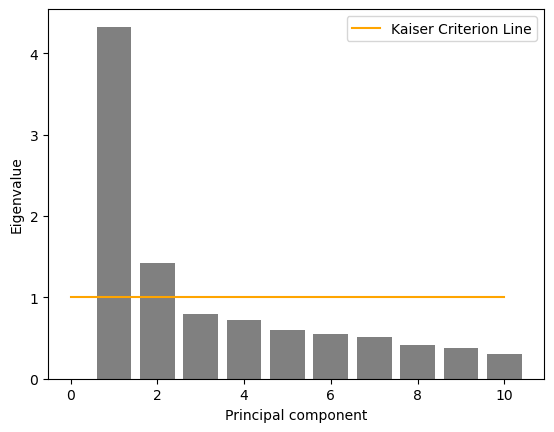

Based on the Kaiser criterion, we would choose 2 principal components. However, this question asks us to conduct the analysis with one principal componenet 


In [402]:
# Extracting the data | Join art ratings with self image and remove outliers
image_art = art_pieces.join(the_data.iloc[:, 205:215]).dropna()

image_NaN = image_art.loc[:, 205:214]   #X
art_NaN1 = image_art.loc[:, :91]

corrMatrix = np.corrcoef(image_NaN,rowvar=False) #Compute the correlation matrix

plt.imshow(corrMatrix)  # Correlation matrix
plt.xlabel('Question')
plt.ylabel('Question')
plt.colorbar()          # Show as heatmap
plt.show()

# # Actual PCA (Principal Componenet Analysis)

# 1. Z-score the data:
zscoredData1 = stats.zscore(image_NaN)

# 2. Initialize PCA object and fit to our data:
pca1 = PCA().fit(zscoredData1)

# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude | The sum of all eigenvalues will be 10 here
eigVals1 = pca1.explained_variance_

# 3b. "Loadings" (eigenvectors): Weights per factor in terms of the original data. 
# In which directions do the eigenvectors point
# Rows are eigenvecotrs
# Columns are original questions
loadings1 = pca1.components_

# 3c. Rotated Data: 
rotatedData1 = pca1.fit_transform(zscoredData1)

# 4. For the purposes of this, you can think of eigenvalues in terms of 
# variance explained:
varExplained1 = eigVals1/sum(eigVals1)*100

# First principal component explains 43.13% of the variance, the second explains 14.183% and so on. 


# 5. Making a scree plot:
num_statements = 10
x = np.linspace(1,num_statements,num_statements)
plt.bar(x, eigVals1, color='gray')
plt.plot([0,num_statements],[1,1],color='orange', label = "Kaiser Criterion Line") # Orange Kaiser criterion line
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.show()

print(f"Based on the Kaiser criterion, we would choose 2 principal components. However, this question asks us to conduct the analysis with one principal componenet ")

##### Interpreting quesitons

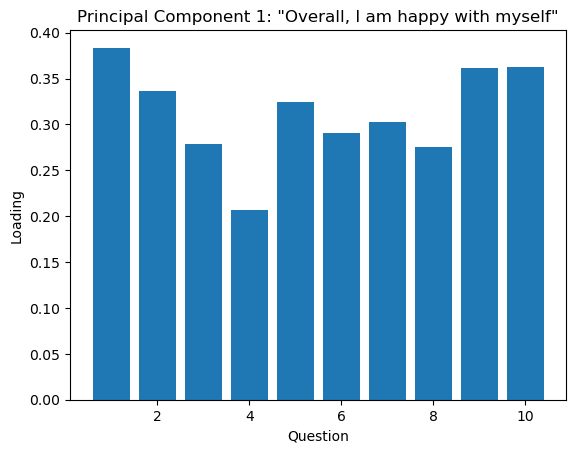

Since all questions are in a positive direction, we can interepret PC 1 as 'Overall, I am happy with myself'


In [403]:
whichPrincipalComponent = 0 # Select and look at one factor at a time, in Python indexing
plt.bar(x,loadings1[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1 because the direction is arbitrary
plt.xlabel('Question')
plt.ylabel('Loading')
plt.title('Principal Component 1: "Overall, I am happy with myself"')
plt.show() # Show bar plot

# Since all questions are in a positive direction, we can interepret PC 1 as "Overall, how do happy are you with yourself?"
print(f"Since all questions are in a positive direction, we can interepret PC 1 as 'Overall, I am happy with myself'")

##### Regression using first principal compoenent

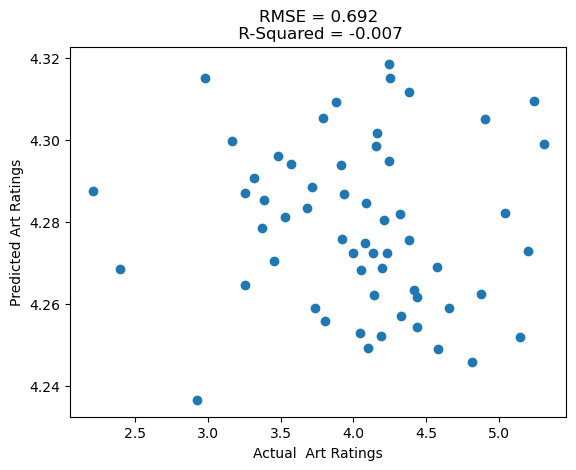

In [404]:
x4 = rotatedData1[:,0]
x4 = x4.reshape(len(x4), 1)
y4 = art_NaN1.mean(axis = 1)
y4 = np.array(y4)

# Splitting the data set for cross-validation
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size= 0.2, random_state = 13604503)

x_train4 = pd.DataFrame(x_train4).to_numpy().reshape(len(x_train4), -1)
y_train4 = pd.DataFrame(y_train4).to_numpy().reshape(len(y_train4), -1)
x_test4 = pd.DataFrame(x_test4).to_numpy().reshape(len(x_test4), -1)
y_test4 = pd.DataFrame(y_test4).to_numpy().reshape(len(y_test4), -1)

# Training/building the model
regr4 = LinearRegression().fit(x_train4,y_train4) 
slope4 = regr4.coef_ 
yInt4 = regr4.intercept_

# Cross-validation 
# b[0]* energy + b[1]*age + b[2]*gender + intercept
yHat4 = slope4[0]*x_train4[:,0] + yInt4
y_pred4 = regr4.predict(x_test4)                        # Finding predicted values
# yHat33 = slope3[0]*x_test3[:,0] + yInt3               # ==> How to find predicted values manually
rmse4 = np.sqrt(np.mean((y_pred4 - y_test4)**2))        # Finding Root Mean Squared Error (RMSE) 
rSqr3 = regr4.score(x4,y4) 

# Plotting | actual values on the 
plt.scatter(y_test4, y_pred4)
# plt.title(f"RMSE = {round(rmse4,3)}")
plt.title(f"RMSE = {round(rmse4,3)}\n R-Squared = {round(rSqr3,3)}")
plt.xlabel('Actual  Art Ratings')
plt.ylabel('Predicted Art Ratings')
plt.show()

#### Question 9: Consider the first 3 principal components of the “dark personality” traits – use these as inputs to a regression model to predict art preference ratings. Which of these components significantly predict art preference ratings? Comment on the likely identity of these factors (e.g. narcissism, manipulativeness, callousness, etc.).   (*Note: Split to many cells)

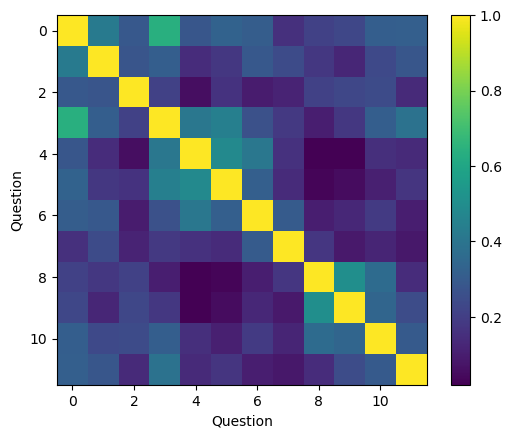

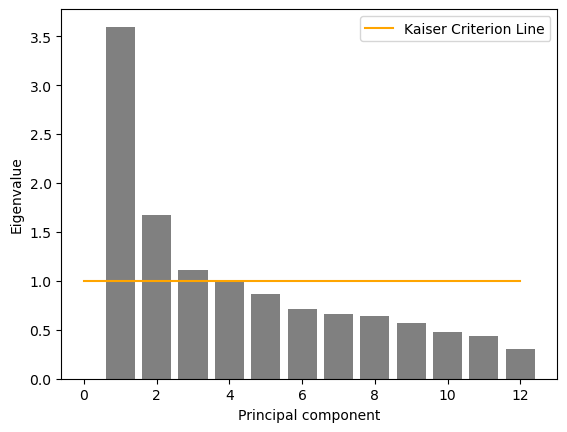

Based on the Kaiser criterion, we could choose 4 principal components. However, this question asks us to conduct the analysis with 3 principal componenet 


In [405]:
# Extracting the data | Join art ratings with self image and remove outliers

dark_art = art_pieces.join(the_data.iloc[:,182:194]).dropna()


dark_NaN = dark_art.loc[:,182:194]   #X
art_NaN2 = dark_art.loc[:, :91]

corrMatrix = np.corrcoef(dark_NaN,rowvar=False) #Compute the correlation matrix

plt.imshow(corrMatrix) 
plt.xlabel('Question')
plt.ylabel('Question')
plt.colorbar()
plt.show()

# Actual PCA (Principal Componenet Analysis)

# 1. Z-score the data:
zscoredData2 = stats.zscore(dark_NaN)

# 2. Initialize PCA object and fit to our data:
pca2 = PCA().fit(zscoredData2)

# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude | The sum of all eigenvalues will be 10 here
eigVals2 = pca2.explained_variance_

# 3b. "Loadings" (eigenvectors): Weights per factor in terms of the original data. 
# In which directions do the eigenvectors point
# Rows are eigenvecotrs
# Columns are original questions
loadings2 = pca2.components_

# 3c. Rotated Data: 
rotatedData2 = pca2.fit_transform(zscoredData2)

# 4. For the purposes of this, you can think of eigenvalues in terms of 
# variance explained:
varExplained2 = eigVals2/sum(eigVals2)*100

# First principal component explains about 30% of the variance, the second explains about 14%, and so on. 


# 5. Making a scree plot:
num_statements = 12
x = np.linspace(1,num_statements,num_statements)
plt.bar(x, eigVals2, color='gray')
plt.plot([0,num_statements],[1,1],color='orange', label = "Kaiser Criterion Line") # Orange Kaiser criterion line
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.show()

print(f"Based on the Kaiser criterion, we could choose 4 principal components. However, this question asks us to conduct the analysis with 3 principal componenet ")

##### Interpreting quesitons

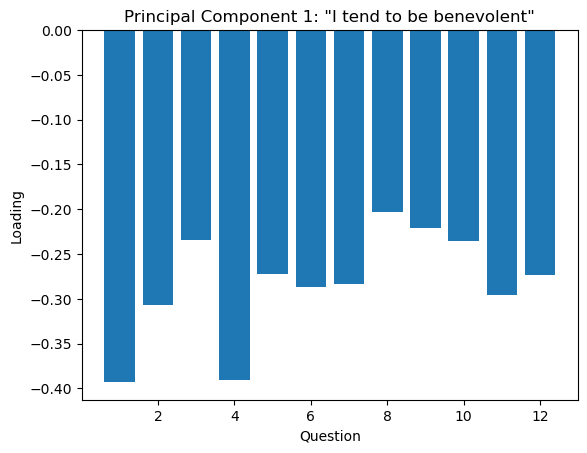

Observe that all the questions are pointing to the negative direction. Therefore, the first principal component can interpreted as 'I tend to be benevolent'.


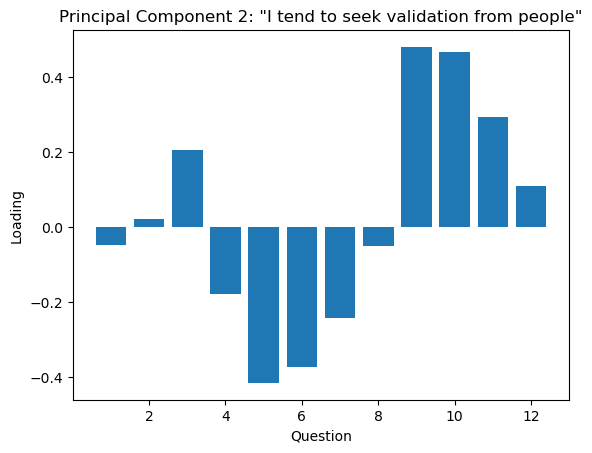

Observe that the questions pointing towards the positive direction are related to validation and admiration. Therefore, the second principal component can be interpreted as 'I tend to seek validation from people'


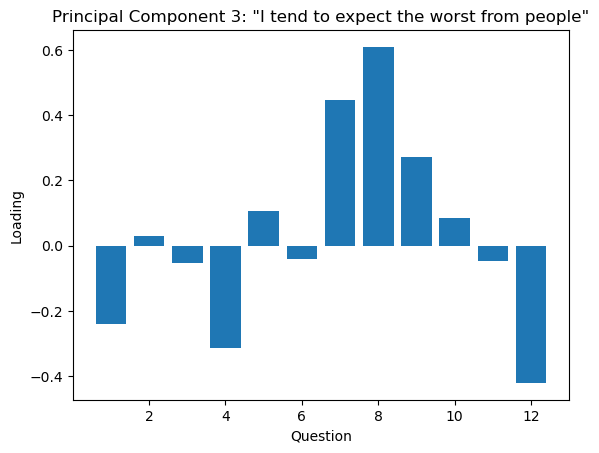

Observe that the questions pointing towards the positive direction are related to cynicism while those poiting towards the negative direction are related to expectations from people. Therefore, the second principal component can be interpreted as'I tend to expect the worst from people'


In [406]:
whichPrincipalComponent = 0 # Select and look at one factor at a time, in Python indexing
plt.bar(x,loadings2[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1 because the direction is arbitrary
plt.xlabel('Question')
plt.ylabel('Loading')
plt.title('Principal Component 1: "I tend to be benevolent"')
plt.show() # Show bar plot

print(f"Observe that all the questions are pointing to the negative direction. Therefore, the first principal component can interpreted as \
'I tend to be benevolent'.")

whichPrincipalComponent = 1
plt.bar(x,loadings2[whichPrincipalComponent,:]*-1)
plt.xlabel('Question')
plt.ylabel('Loading')
plt.title('Principal Component 2: "I tend to seek validation from people"')
plt.show()

print(f"Observe that the questions pointing towards the positive direction are related to validation and admiration. Therefore, the second \
principal component can be interpreted as 'I tend to seek validation from people'")

whichPrincipalComponent = 2
plt.bar(x,loadings2[whichPrincipalComponent,:]*-1)
plt.xlabel('Question')
plt.ylabel('Loading')
plt.title('Principal Component 3: "I tend to expect the worst from people"')
plt.show()

print(f"Observe that the questions pointing towards the positive direction are related to cynicism while those poiting towards the negative\
 direction are related to expectations from people. Therefore, the second principal component can be interpreted as\
'I tend to expect the worst from people'")

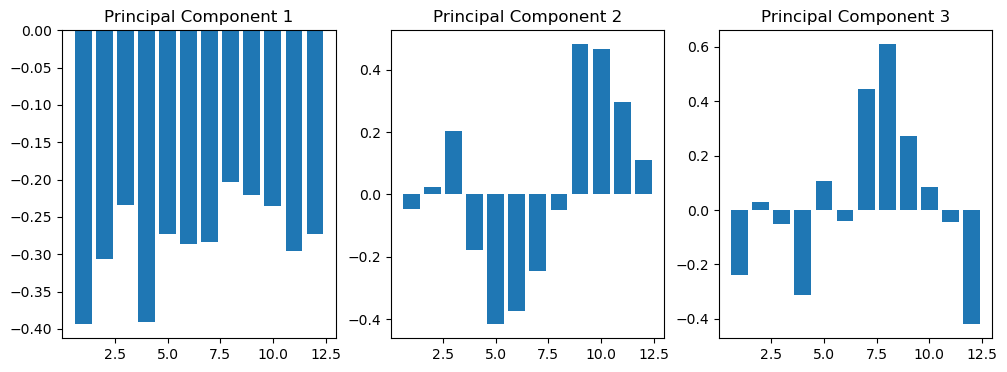

In [407]:
# Having all the plots next to one another

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].bar(np.linspace(1,num_statements,num_statements),loadings2[0,:]*-1) 
axs[0].set_title('Principal Component 1')
axs[1].bar(np.linspace(1,num_statements,num_statements),loadings2[1,:]*-1) 
axs[1].set_title('Principal Component 2')
axs[2].bar(np.linspace(1,num_statements,num_statements),loadings2[2,:]*-1) 
axs[2].set_title('Principal Component 3')
plt.show()

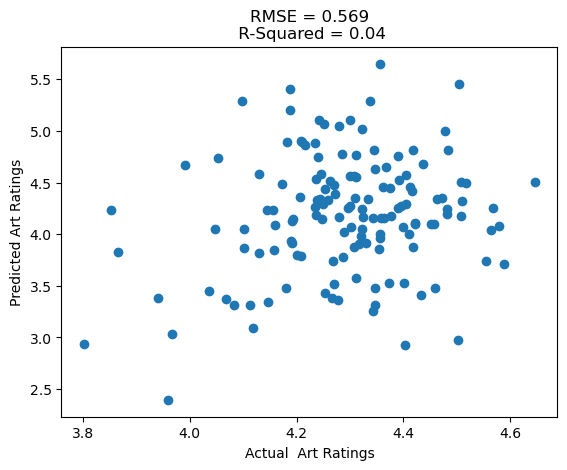

In [408]:
x5 = rotatedData2[:,0:3]
y5 = art_NaN2.mean(axis = 1)

# Splitting the data set for cross-validation
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5, y5, test_size= 0.5, random_state = 13604503)

x_train5 = pd.DataFrame(x_train5).to_numpy().reshape(len(x_train5), -1)
y_train5 = pd.DataFrame(y_train5).to_numpy().reshape(len(y_train5), -1)
x_test5 = pd.DataFrame(x_test5).to_numpy().reshape(len(x_test5), -1)
y_test5 = pd.DataFrame(y_test5).to_numpy().reshape(len(y_test5), -1)



# Training/building the model
regr5 = LinearRegression().fit(x_train5,y_train5) 
slope5 = regr5.coef_ 
yInt5 = regr5.intercept_

# Cross-validation 
# b[0]* energy + b[1]*age + b[2]*gender + intercept
yHat5 = slope5[:,0]*x_train5[:,0] + slope5[:,1]*x_train5[:,1] + slope5[:,2]*x_train5[:,2] + yInt5
y_pred5 = regr5.predict(x_test5)                        # Finding predicted values
# yHat33 = slope3[0]*x_test3[:,0] + yInt3               #  ==> How to find predicted values manually
rmse5 = np.sqrt(np.mean((y_pred5 - y_test5)**2))        # Finding Root Mean Squared Error (RMSE) 
rSqr4 = regr5.score(x5,y5) 

# Plotting | actual values on the 
plt.scatter(y_pred5, y_test5)
# plt.title(f"RMSE = {round(rmse5,3)}")
plt.title(f"RMSE = {round(rmse5,3)}\n R-Squared = {round(rSqr4,3)}")
plt.xlabel('Actual  Art Ratings')
plt.ylabel('Predicted Art Ratings')
plt.show()

#### Question 10: Can you determine the political orientation of the users (to simplify things and avoid gross class imbalance issues, you can consider just 2 classes: “left” (progressive & liberal) vs. “nonleft” (everyone else)) from all the other information available, using any classification model of your choice? Make sure to comment on the classification quality of this model. 

In [409]:
# Predicting political orientation which is simplified as either "left" or "non-left". Essentially, binary outcomes.
# For that reason, it would appropiate to use Logistic Regression to predict the binary outcome based on many predictors.
# Goal: Predict political orientation based on all information availible

"""
Plan:   1) Reduce art ratings to mean
        2) Reduce energy ratings to mean
        3) Reduce Dark personality to principal components  
        4) Reduce Action preference to principal componenets
        5) Redudce Self image/esteem to principal componenents 
        6) Join with User age  [215]
        7) Join with political orientation (0 or 1 ==> binary)
        8) Join with art education   [218]
        9) Join with General sophistication  [219]
        10) Join with if user is an artist [220]
"""

the_data2 = the_data.copy()
the_data2 = the_data2.dropna()

# Joining mean art ratings and mean energy ratings
x5 = pd.DataFrame(the_data2.loc[:,:91].mean(axis =1)).join(pd.DataFrame(the_data2.loc[:,91:182].mean(axis =1)).rename(columns={0: 1}))

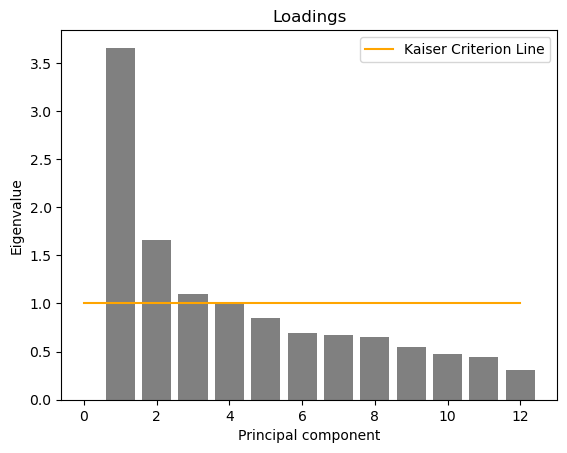

Based on the Kaiser criterion, we could choose the first 3 principal components for Dark personality. 


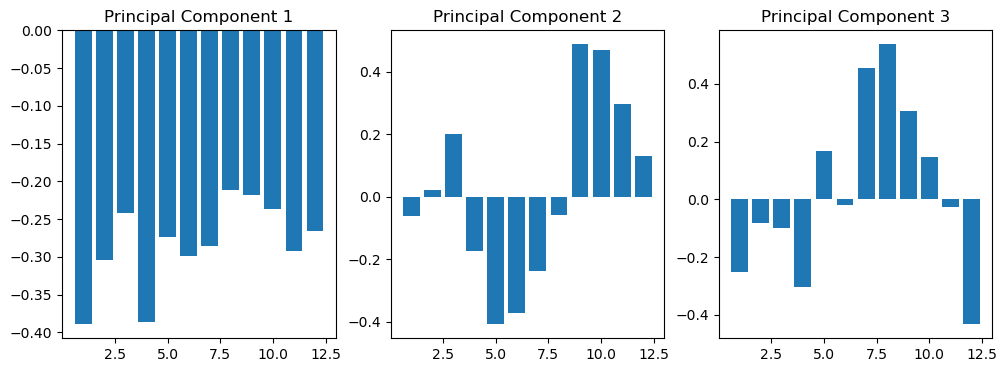

We can interpret the following principal componenets the same as the following: 
PC 1: 'I tend to be benevolent'
PC 2: 'I tend to seek validation from people'
PC 3: 'I tend to expect the worst from people'


In [410]:
# PCA for dark personality

# Extracting the dark personality data
dark_NaN2 = the_data2.iloc[:,182:194]

# PCA (Principal Componenet Analysis)

# 1. Z-score the data:
zscoredData3 = stats.zscore(dark_NaN2)

# 2. Initialize PCA object and fit to our data:
pca3 = PCA().fit(zscoredData3)

# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude | The sum of all eigenvalues will be 10 here
eigVals3 = pca3.explained_variance_

# 3b. "Loadings" (eigenvectors): Weights per factor in terms of the original data. 
loadings3 = pca3.components_

# 3c. Rotated Data: 
rotatedData3 = pca3.fit_transform(zscoredData3)

# 4. For the purposes of this, you can think of eigenvalues in terms of 
# variance explained:
varExplained3 = eigVals3/sum(eigVals3)*100

# 5. Making a scree plot:
num_statements = 12
x = np.linspace(1,num_statements,num_statements)
plt.bar(x, eigVals3, color='gray')
plt.plot([0,num_statements],[1,1],color='orange', label = "Kaiser Criterion Line") # Orange Kaiser criterion line
plt.title("Loadings")
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.show()

print(f"Based on the Kaiser criterion, we could choose the first 3 principal components for Dark personality. ")

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].bar(np.linspace(1,num_statements,num_statements),loadings3[0,:]*-1) 
axs[0].set_title('Principal Component 1')
axs[1].bar(np.linspace(1,num_statements,num_statements),loadings3[1,:]*-1) 
axs[1].set_title('Principal Component 2')
axs[2].bar(np.linspace(1,num_statements,num_statements),loadings3[2,:]*-1) 
axs[2].set_title('Principal Component 3')
plt.show()

print(f"We can interpret the following principal componenets the same as the following: \n\
PC 1: 'I tend to be benevolent'\n\
PC 2: 'I tend to seek validation from people'\n\
PC 3: 'I tend to expect the worst from people'")

# So we add the new 3 principal componenets to our x variable

# Col 1: mean art rating | col2: mean energy rating | col 3-5: PC for dark personality 
x5 = np.concatenate([np.array(x5),rotatedData3[:, :3]], axis=1)

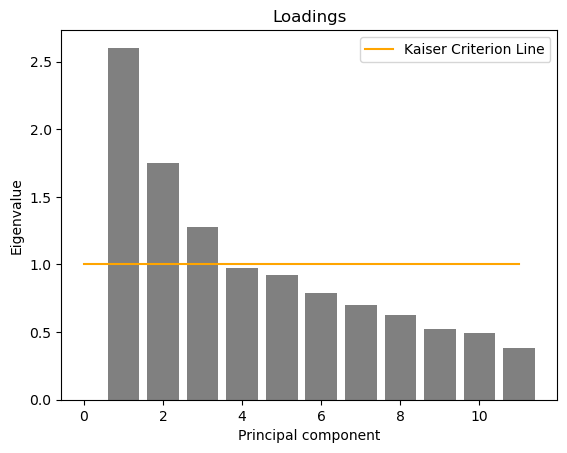

Based on the Kaiser criterion, we could choose the first 3 principal components for Action Preference. 


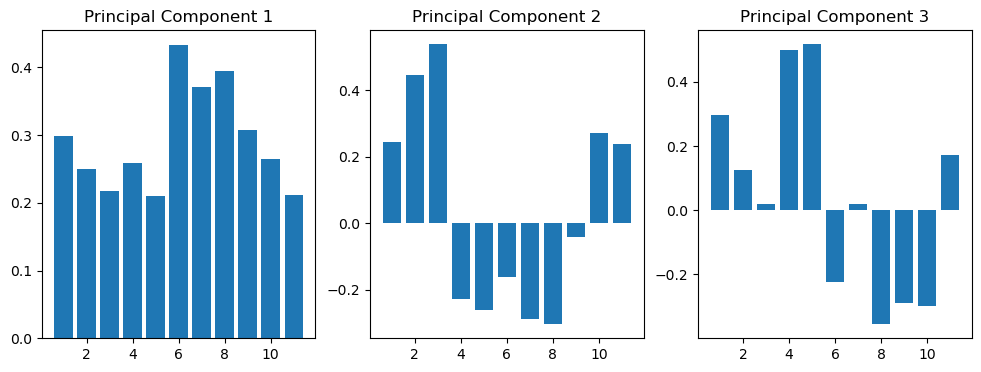

We can interpret the following principal componenets the same as the following: 
PC 1: 'I like doing activities'
PC 2: 'I like playing games (board games, role-playing, video games, etc...)'
PC 3: 'I like peaceful\low-stress activities'


In [411]:
# PCA for action personality

# Extracting action preference data
action_Nan = the_data2.iloc[:,194:205]

# PCA (Principal Componenet Analysis)

# 1. Z-score the data:
zscoredData4 = stats.zscore(action_Nan)

# 2. Initialize PCA object and fit to our data:
pca4 = PCA().fit(zscoredData4)

# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude | The sum of all eigenvalues will be 10 here
eigVals4 = pca4.explained_variance_

# 3b. "Loadings" (eigenvectors): Weights per factor in terms of the original data. 
loadings4 = pca4.components_

# 3c. Rotated Data: 
rotatedData4 = pca4.fit_transform(zscoredData4)

# 4. For the purposes of this, you can think of eigenvalues in terms of 
# variance explained:
varExplained4 = eigVals4/sum(eigVals4)*100

# 5. Making a scree plot:
num_statements = 11
x = np.linspace(1,num_statements,num_statements)
plt.bar(x, eigVals4, color='gray')
plt.plot([0,num_statements],[1,1],color='orange', label = "Kaiser Criterion Line") # Orange Kaiser criterion line
plt.title("Loadings")
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.show()

print(f"Based on the Kaiser criterion, we could choose the first 3 principal components for Action Preference. ")

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].bar(np.linspace(1,num_statements,num_statements),loadings4[0,:]*-1) 
axs[0].set_title('Principal Component 1')
axs[1].bar(np.linspace(1,num_statements,num_statements),loadings4[1,:]*-1) 
axs[1].set_title('Principal Component 2')
axs[2].bar(np.linspace(1,num_statements,num_statements),loadings4[2,:]*-1) 
axs[2].set_title('Principal Component 3')
plt.show()

print(f"We can interpret the following principal componenets the same as the following: \n\
PC 1: 'I like doing activities'\n\
PC 2: 'I like playing games (board games, role-playing, video games, etc...)'\n\
PC 3: 'I like peaceful\low-stress activities'")

# So we add the new 3 principal componenets to our x variable

# Col 1: mean art rating | col2: mean energy rating | col 3-5: PC for dark personality | col 6-8: PC for actin preference
x5 = np.concatenate([x5,rotatedData4[:, :3]], axis=1)

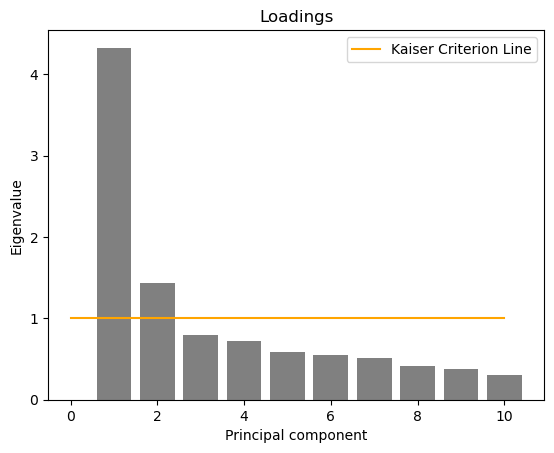

Based on the Kaiser criterion, we could choose the first 2 principal components for self image\esteem. 


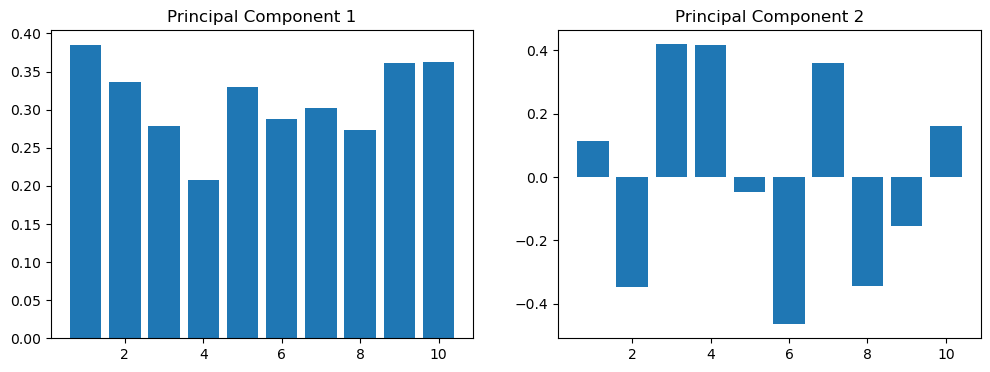

We can interpret the following principal componenets the same as the following: 
PC 1: 'Overall, I am happy with myself'
PC 2: 'I tend to think I have self-wroth'


In [412]:
# PCA for self image/esteem

# Extracting action preference data
image_NaN2 = the_data2.iloc[:,205:215]

# PCA (Principal Componenet Analysis)

# 1. Z-score the data:
zscoredData5 = stats.zscore(image_NaN2)

# 2. Initialize PCA object and fit to our data:
pca5 = PCA().fit(zscoredData5)

# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude | The sum of all eigenvalues will be 10 here
eigVals5 = pca5.explained_variance_

# 3b. "Loadings" (eigenvectors): Weights per factor in terms of the original data. 
loadings5 = pca5.components_

# 3c. Rotated Data: 
rotatedData5 = pca5.fit_transform(zscoredData5)

# 4. For the purposes of this, you can think of eigenvalues in terms of 
# variance explained:
varExplained5 = eigVals5/sum(eigVals5)*100

# 5. Making a scree plot:
num_statements = 10
x = np.linspace(1,num_statements,num_statements)
plt.bar(x, eigVals5, color='gray')
plt.plot([0,num_statements],[1,1],color='orange', label = "Kaiser Criterion Line") # Orange Kaiser criterion line
plt.title("Loadings")
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.show()

print(f"Based on the Kaiser criterion, we could choose the first 2 principal components for self image\esteem. ")

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].bar(np.linspace(1,num_statements,num_statements),loadings5[0,:]*-1) 
axs[0].set_title('Principal Component 1')
axs[1].bar(np.linspace(1,num_statements,num_statements),loadings5[1,:]*-1) 
axs[1].set_title('Principal Component 2')
plt.show()

print(f"We can interpret the following principal componenets the same as the following: \n\
PC 1: 'Overall, I am happy with myself'\n\
PC 2: 'I tend to think I have self-wroth'")

# # So we add the new 2 principal componenets to our x variable

# Col 1: mean art rating | col2: mean energy rating | col 3-5: PC for dark personality | col 6-8: PC for action preference |
# col 9-10: PC for self image

x5 = np.concatenate([x5,rotatedData5[:, :2]], axis=1)
the_data2 = the_data2.to_numpy()

In [413]:
# Now, we want to create a new column of political orientation that takes the values of 0 (non-liberal) or 1 (liberal)

# age, gender, art education, general sophistication, is artist, political orientation
columns_to_extract = [215, 216, 218, 219, 220, 217]
x5 = np.concatenate([x5, the_data2[:, columns_to_extract]], axis=1)

x5 = pd.DataFrame(x5)

# Change labels of political orientation (column 15)
x5.loc[x5[15].isin([3,4,5,6]), 15] = 0
x5.loc[x5[15].isin([1,2]), 15] = 1

##### Actual Logistic Regression using 15 predictors:

Accuracy of model: 65.9%

Number of liberal in dataset: 158
Number of non-liberal in dataset: 118
If the model guessed eveyone was liberal, its accuracy would be 57.0%
So, the differnce between the accuracy of our model and guessing is 8.9%


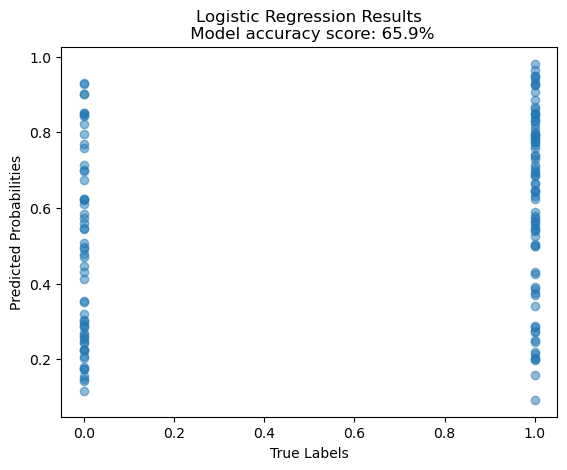

In [414]:
# Now for the logistic regression
x6 = x5.iloc[:,:15]
x6 = x6.to_numpy()
y6 = x5.iloc[:, -1]

# Split data for cross-validation
x_train6, x_test6, y_train6, y_test6 = train_test_split(x6, y6, test_size= 0.5, random_state = 13604503)

# Training/building the model
regr6 = LogisticRegression().fit(x_train6,y_train6)
slope6 = regr6.coef_ 
yInt6 = regr6.intercept_ 

# Assessing acuuracy
accuracy = regr6.score(x_test6, y_test6)
print(f"Accuracy of model: {round(accuracy,3)*100}%\n")

guess = (y6.value_counts()[1]/((y6.value_counts()[1])+y6.value_counts()[0]))*100
guess = np.floor(guess)

# Assessing if model is better than just guessing eveyone is liberal (1)
print(f"Number of liberal in dataset: {y6.value_counts()[1] }")
print(f"Number of non-liberal in dataset: {y6.value_counts()[0]}")
print(f"If the model guessed eveyone was liberal, its accuracy would be {guess}%")
print(f"So, the differnce between the accuracy of our model and guessing is {round((round(accuracy,3)*100) - guess, 2)}%")

y_pred_proba = regr6.predict_proba(x_test6)[:, 1]

plt.scatter(y_test6, y_pred_proba, alpha=0.5)
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.title(f'Logistic Regression Results\n Model accuracy score: {round(accuracy,3)*100}%')
plt.show()

##### Trying random forest classification (Why not.)

In [415]:
from sklearn.ensemble import AdaBoostClassifier

numTrees = 100
clf = RandomForestClassifier(n_estimators=numTrees).fit(x_train6,y_train6) #bagging numTrees trees

# Use model to make predictions:
predictions = clf.predict(x_test6) 

# Assess model accuracy:
modelAccuracy = accuracy_score(y_test6,predictions)

# Note: If you run the all the code again the difference between logistic regression and random tree classification would be different due to randomization
print(f'Random forest model accuracy: {round(modelAccuracy,3)*100}')
print(f"So difference in accuracy between logistic regressiona and random tree classificaition is {round(accuracy - modelAccuracy, 5)}% which is very minimal.")
print(f"In this case, borth logistic regression and random forest classification give about the same result.\n")


# Adaptive Boosting
ada_clf = AdaBoostClassifier(n_estimators=numTrees, learning_rate=1).fit(x_train6, y_train6)
predictions = ada_clf.predict(x_test6)
accuracy = ada_clf.score(x_test6, y_test6)

print(f"Accuracy from adaptive boosting is {round(accuracy,4)*100}%")


Random forest model accuracy: 65.2
So difference in accuracy between logistic regressiona and random tree classificaition is 0.00725% which is very minimal.
In this case, borth logistic regression and random forest classification give about the same result.

Accuracy from adaptive boosting is 57.25%
